<a href="https://colab.research.google.com/github/pndlghn/Certainty-Factor-Fuzzy-Logic/blob/main/Certainty_Factor_%26_Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CERTAINTY FACTOR (CF)**
Diagnosa penyakit Flu berdasarkan gejala yang diberikan user.

In [ ]:
gejala_user = {
    "demam": 0.7,
    "batuk": 0.5,
    "sakit_tenggorokan": 0.6
}

pengetahuan = {
    "flu": {
        "demam": 0.8,
        "batuk": 0.7,
        "sakit_tenggorokan": 0.6
    }
}

def hitung_cf(gejala_user, pengetahuan_pakar):
    cf_total = 0
    first = True
    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar:
            cf_pakar = pengetahuan_pakar[gejala]
            cf = cf_user * cf_pakar
            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)
    return cf_total

cf_flu = hitung_cf(gejala_user, pengetahuan["flu"])
print(f"CF diagnosis Flu: {cf_flu:.2f}")


CF diagnosis Flu: 0.82


In [ ]:
gejala_user = {
    "nyeri_sendi": 0.8,
    "bengkak_sendi": 0.7,
    "kaku_sendi_pagi": 0.9,
    "demam_ringan": 0.3
}

pengetahuan = {
    "rheumatoid_arthritis": {
        "nyeri_sendi": 0.9,
        "bengkak_sendi": 0.8,
        "kaku_sendi_pagi": 0.9,
        "demam_ringan": 0.4
    },
    "osteoarthritis": {
        "nyeri_sendi": 0.8,
        "bengkak_sendi": 0.6,
        "kaku_sendi_pagi": 0.5
    }
}

def hitung_cf(gejala_user, pengetahuan_pakar):
    cf_total = 0
    first = True
    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar:
            cf_pakar = pengetahuan_pakar[gejala]
            cf = cf_user * cf_pakar
            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)
    return cf_total

# Mendiagnosa dua penyakit berdasarkan gejala yang sama
for penyakit in pengetahuan:
    cf_result = hitung_cf(gejala_user, pengetahuan[penyakit])
    print(f"CF diagnosis {penyakit}: {cf_result:.2f}")


CF diagnosis rheumatoid_arthritis: 0.98
CF diagnosis osteoarthritis: 0.89


In [ ]:
# Example 4: Diabetes Diagnosis with Weighted Symptoms
gejala_user = {
    "sering_haus": 0.8,
    "sering_buang_air_kecil": 0.9,
    "penurunan_berat_badan": 0.6,
    "luka_lambat_sembuh": 0.7,
    "penglihatan_kabur": 0.5
}

# Pengetahuan pakar dengan bobot gejala
pengetahuan = {
    "diabetes_tipe1": {
        "sering_haus": 0.9,
        "sering_buang_air_kecil": 0.9,
        "penurunan_berat_badan": 0.8,
        "luka_lambat_sembuh": 0.5
    },
    "diabetes_tipe2": {
        "sering_haus": 0.7,
        "sering_buang_air_kecil": 0.7,
        "penurunan_berat_badan": 0.5,
        "luka_lambat_sembuh": 0.8,
        "penglihatan_kabur": 0.6
    }
}

# Bobot kepentingan gejala (1–5)
bobot_gejala = {
    "sering_haus": 4,
    "sering_buang_air_kecil": 4,
    "penurunan_berat_badan": 3,
    "luka_lambat_sembuh": 5,
    "penglihatan_kabur": 2
}


# **FUZZY LOGIC**

Menentukan tingkat risiko kesehatan berdasarkan suhu tubuh.

In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.2 MB/s eta 0:00:00


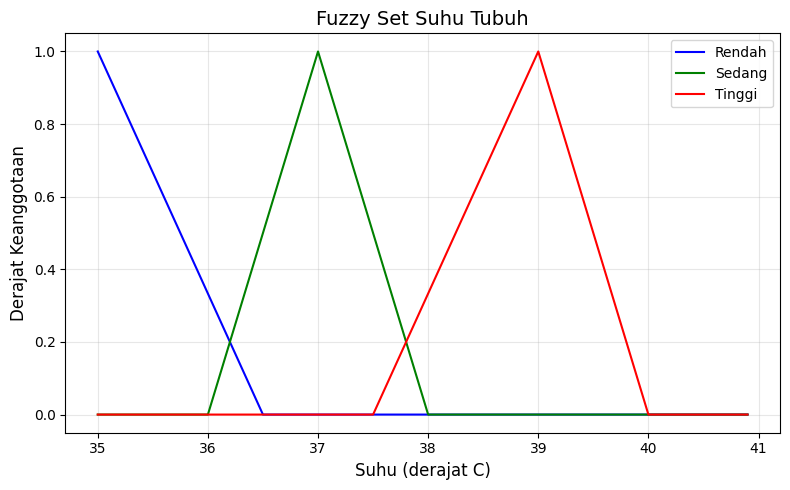


Derajat Keanggotaan suhu 35.2°C:
- Rendah: 0.87
- Sedang: 0.00
- Tinggi: 0.00

Interpretasi: Suhu tubuh rendah


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Define temperature range from 35°C to 40.9°C with 0.1°C increments
suhu = np.arange(35, 41, 0.1)

# Create triangular membership functions for temperature categories
rendah = fuzz.trimf(suhu, [35, 35, 36.5])    # Low temperature (35-36.5°C)
sedang = fuzz.trimf(suhu, [36, 37, 38])      # Normal temperature (36-38°C)
tinggi = fuzz.trimf(suhu, [37.5, 39, 40])    # High temperature (37.5-40°C)

# Plot the membership functions
plt.figure(figsize=(8, 5))
plt.plot(suhu, rendah, 'b', linewidth=1.5, label='Rendah')
plt.plot(suhu, sedang, 'g', linewidth=1.5, label='Sedang')
plt.plot(suhu, tinggi, 'r', linewidth=1.5, label='Tinggi')
plt.title('Fuzzy Set Suhu Tubuh', fontsize=14)
plt.xlabel('Suhu (derajat C)', fontsize=12)
plt.ylabel('Derajat Keanggotaan', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Input temperature to evaluate
input_suhu = 35.2

# Calculate membership degrees
suhu_rendah = fuzz.interp_membership(suhu, rendah, input_suhu)
suhu_sedang = fuzz.interp_membership(suhu, sedang, input_suhu)
suhu_tinggi = fuzz.interp_membership(suhu, tinggi, input_suhu)

# Print the results
print(f"\nDerajat Keanggotaan suhu {input_suhu}°C:")
print(f"- Rendah: {suhu_rendah:.2f}")
print(f"- Sedang: {suhu_sedang:.2f}")
print(f"- Tinggi: {suhu_tinggi:.2f}")

# Interpretation of results
if suhu_rendah > max(suhu_sedang, suhu_tinggi):
    print("\nInterpretasi: Suhu tubuh rendah")
elif suhu_sedang > max(suhu_rendah, suhu_tinggi):
    print("\nInterpretasi: Suhu tubuh normal")
else:
    print("\nInterpretasi: Suhu tubuh tinggi")

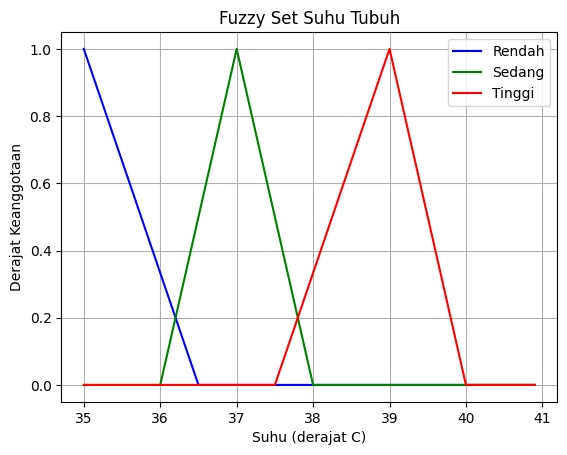

Derajat Keanggotaan suhu 37.0 derajat C:
- Rendah: 0.00
- Sedang: 1.00
- Tinggi: 0.00


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Definisi range suhu dari 35°C sampai 40.9°C dengan interval 0.1
suhu = np.arange(35, 41, 0.1)

# Pembentukan fungsi keanggotaan fuzzy
rendah = fuzz.trimf(suhu, [35, 35, 36.5])
sedang = fuzz.trimf(suhu, [36, 37, 38])
tinggi = fuzz.trimf(suhu, [37.5, 39, 40])

# Visualisasi fungsi keanggotaan
plt.figure()
plt.plot(suhu, rendah, 'b', label='Rendah')
plt.plot(suhu, sedang, 'g', label='Sedang')
plt.plot(suhu, tinggi, 'r', label='Tinggi')
plt.title('Fuzzy Set Suhu Tubuh')
plt.xlabel('Suhu (derajat C)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

# Input suhu yang akan dievaluasi
input_suhu = 37.0

# Menghitung derajat keanggotaan untuk input suhu
suhu_rendah = fuzz.interp_membership(suhu, rendah, input_suhu)
suhu_sedang = fuzz.interp_membership(suhu, sedang, input_suhu)
suhu_tinggi = fuzz.interp_membership(suhu, tinggi, input_suhu)

# Menampilkan hasil
print(f"Derajat Keanggotaan suhu {input_suhu} derajat C:")
print(f"- Rendah: {suhu_rendah:.2f}")
print(f"- Sedang: {suhu_sedang:.2f}")
print(f"- Tinggi: {suhu_tinggi:.2f}")

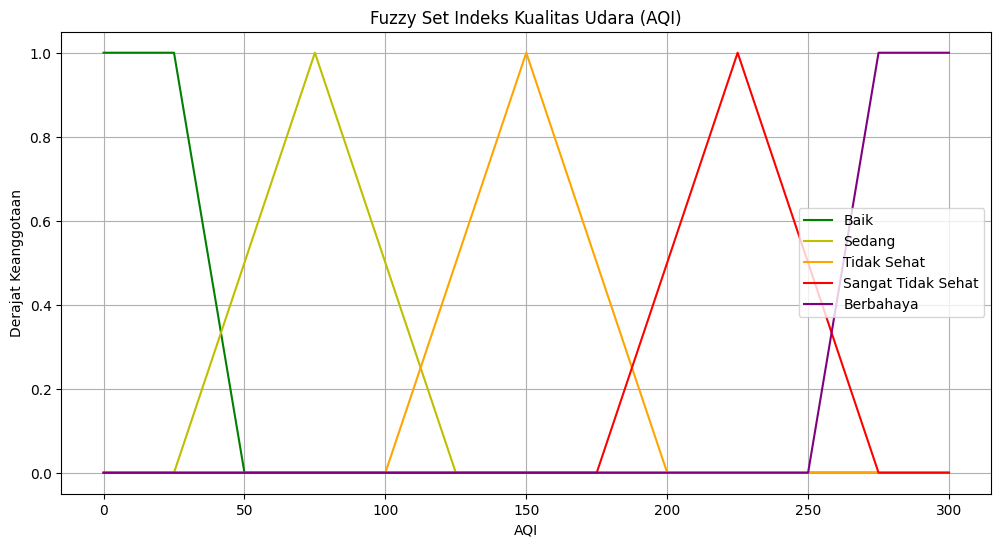

Derajat keanggotaan AQI 120:
- Baik: 0.00
- Sedang: 0.10
- Tidak Sehat: 0.40
- Sangat Tidak Sehat: 0.00
- Berbahaya: 0.00


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Universe of discourse (0-300)
aqi = np.arange(0, 301, 1)

# Fuzzy sets for Air Quality Index
baik = fuzz.trapmf(aqi, [0, 0, 25, 50])
sedang = fuzz.trimf(aqi, [25, 75, 125])
tidak_sehat = fuzz.trimf(aqi, [100, 150, 200])
sangat_tidak_sehat = fuzz.trimf(aqi, [175, 225, 275])
berbahaya = fuzz.trapmf(aqi, [250, 275, 300, 300])

# Visualize fuzzy sets
plt.figure(figsize=(12, 6))
plt.plot(aqi, baik, 'g', linewidth=1.5, label='Baik')
plt.plot(aqi, sedang, 'y', linewidth=1.5, label='Sedang')
plt.plot(aqi, tidak_sehat, 'orange', linewidth=1.5, label='Tidak Sehat')
plt.plot(aqi, sangat_tidak_sehat, 'r', linewidth=1.5, label='Sangat Tidak Sehat')
plt.plot(aqi, berbahaya, 'purple', linewidth=1.5, label='Berbahaya')
plt.title("Fuzzy Set Indeks Kualitas Udara (AQI)")
plt.xlabel('AQI')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

# Calculate membership for a specific input
input_aqi = 120
aqi_baik = fuzz.interp_membership(aqi, baik, input_aqi)
aqi_sedang = fuzz.interp_membership(aqi, sedang, input_aqi)
aqi_tidak_sehat = fuzz.interp_membership(aqi, tidak_sehat, input_aqi)
aqi_sangat_tidak_sehat = fuzz.interp_membership(aqi, sangat_tidak_sehat, input_aqi)
aqi_berbahaya = fuzz.interp_membership(aqi, berbahaya, input_aqi)

print(f"Derajat keanggotaan AQI {input_aqi}:")
print(f"- Baik: {aqi_baik:.2f}")
print(f"- Sedang: {aqi_sedang:.2f}")
print(f"- Tidak Sehat: {aqi_tidak_sehat:.2f}")
print(f"- Sangat Tidak Sehat: {aqi_sangat_tidak_sehat:.2f}")
print(f"- Berbahaya: {aqi_berbahaya:.2f}")

Untuk temperatur 45°C dan kelembaban 110%, kecepatan kipas AC: 91.67%


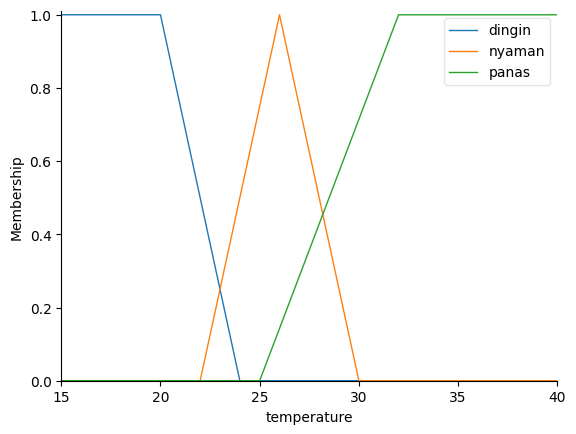

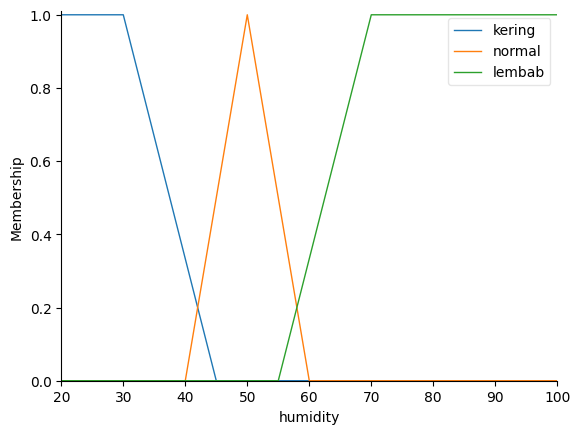

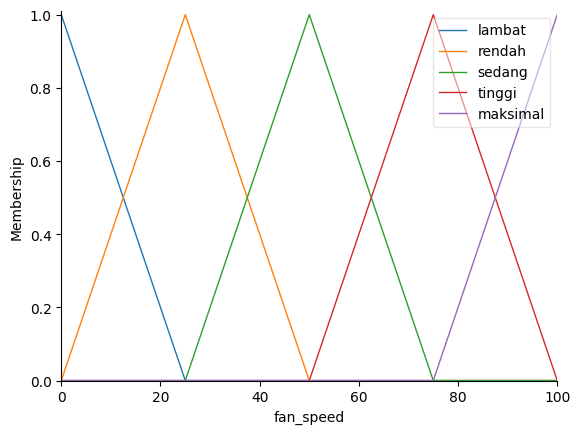

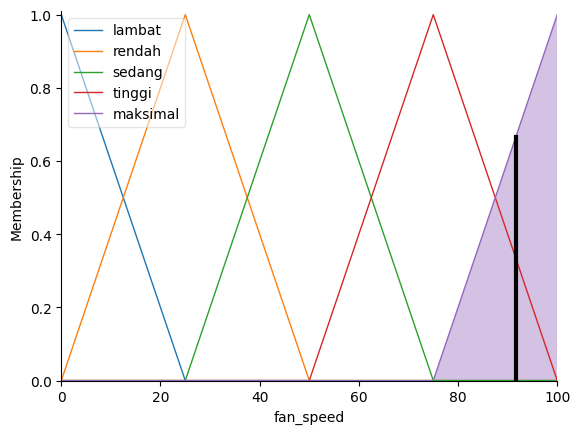

In [22]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Input variables
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')

# Output variable
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Membership functions for temperature
temperature["dingin"] = fuzz.trapmf(temperature.universe, [15, 15, 20, 24])
temperature["nyaman"] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature["panas"] = fuzz.trapmf(temperature.universe, [25, 32, 40, 40])

# Membership functions for humidity
humidity["kering"] = fuzz.trapmf(humidity.universe, [20, 20, 30, 45])
humidity["normal"] = fuzz.trimf(humidity.universe, [40, 50, 60])
humidity["lembab"] = fuzz.trapmf(humidity.universe, [55, 70, 100, 100])

# Membership functions for fan_speed
fan_speed["lambat"] = fuzz.trimf(fan_speed.universe, [0, 0, 25])
fan_speed["rendah"] = fuzz.trimf(fan_speed.universe, [0, 25, 50])
fan_speed["sedang"] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed["tinggi"] = fuzz.trimf(fan_speed.universe, [50, 75, 100])
fan_speed["maksimal"] = fuzz.trimf(fan_speed.universe, [75, 100, 100])

# Visualize membership functions
temperature.view()
humidity.view()
fan_speed.view()

# Define fuzzy rules
rule1 = ctrl.Rule(temperature["dingin"] & humidity["kering"], fan_speed["lambat"])
rule2 = ctrl.Rule(temperature["dingin"] & humidity["normal"], fan_speed["lambat"])
rule3 = ctrl.Rule(temperature["dingin"] & humidity["lembab"], fan_speed["rendah"])
rule4 = ctrl.Rule(temperature["nyaman"] & humidity["kering"], fan_speed["rendah"])
rule5 = ctrl.Rule(temperature["nyaman"] & humidity["normal"], fan_speed["sedang"])
rule6 = ctrl.Rule(temperature["nyaman"] & humidity["lembab"], fan_speed["tinggi"])
rule7 = ctrl.Rule(temperature["panas"] & humidity["kering"], fan_speed["tinggi"])
rule8 = ctrl.Rule(temperature["panas"] & humidity["normal"], fan_speed["tinggi"])
rule9 = ctrl.Rule(temperature["panas"] & humidity["lembab"], fan_speed["maksimal"])

# Create control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
fan_simulation = ctrl.ControlSystemSimulation(fan_ctrl)

# Input values
input_temp = 45
input_humid = 110

fan_simulation.input['temperature'] = input_temp
fan_simulation.input['humidity'] = input_humid

# Compute result
fan_simulation.compute()
print(f"Untuk temperatur {input_temp}°C dan kelembaban {input_humid}%, kecepatan kipas AC: {fan_simulation.output['fan_speed']:.2f}%")

# Visualize result
fan_speed.view(sim=fan_simulation)
plt.show()

# **Tugas Certainty Factor & Fuzzy Logic**

## **Certainty Factor**

**Instruksi Tugas**

CF:
- Ubah nilai CF gejala dan amati perubahan hasil
  **Jawaban**
  - Nilai awal:
  ```python
  gejala_user = {
    "demam": 0.7,
    "batuk": 0.5,
    "sakit_tenggorokan": 0.6
}
  ```
    **Hasil CF diagnosis Flu: 0.82**

  - Setelah diubah:
  ```python
  gejala_user = {
    "demam": 0.9,  # meningkat dari 0.7
    "batuk": 0.8,   # meningkat dari 0.5
    "sakit_tenggorokan": 0.7  # meningkat dari 0.6
}
  ```
    **Hasil CF diagnosis Flu: 0.93 (meningkat secara signifikan)**
  
- Tambahkan 5 gejala baru seperti dengan nilai CF.
  - 5 gejala baru
    ```python
    gejala_user = {
        "demam": 0.7,
        "batuk": 0.5,
        "sakit_tenggorokan": 0.6,
        "pilek": 0.4,
        "sakit_kepala": 0.3,
        "lemas": 0.5,
        "nyeri_otot": 0.4,
        "menggigil": 0.3
    }
    ```
    ```python
    pengetahuan = {
    "flu": {
        "demam": 0.8,
        "batuk": 0.7,
        "sakit_tenggorokan": 0.6,
        "pilek": 0.9,
        "sakit_kepala": 0.5,
        "lemas": 0.6,
        "nyeri_otot": 0.5,
        "menggigil": 0.4
    }
    }
    ```
- Jika `"demam"` diubah jadi `0.2`, bagaimana hasilnya? Mengapa?

  **Jawaban**

    Hasil CF diagnosis Flu: 0.65(Hasilnya menurun)

  **Mengapa hasilnya turun?**
    - Demam adalah gejala utama flu dengan CF pakar 0.8 (nilai tinggi)
    - Ketika CF user untuk demam turun drastis (dari 0.7 ke 0.2), kontribusi gejala ini terhadap diagnosis menjadi kecil (0.2 * 0.8 = 0.16)
    - Ini mengurangi keyakinan keseluruhan terhadap diagnosis flu

- Jelaskan bagaimana hasil perubahannya  dalam bentuk komentar atau teks cell
 **Jawaban**
 Sistem Certainty Factor bekerja dengan mengkombinasikan bukti-bukti (gejala) untuk membentuk keyakinan terhadap suatu diagnosis. Beberapa pola yang terlihat:

1. Hubungan Proporsional:
- Nilai CF diagnosis berbanding lurus dengan nilai CF gejala
- Semakin tinggi CF gejala, semakin tinggi CF diagnosis

2. Efek Akumulasi:
- Penambahan gejala baru yang relevan akan meningkatkan CF diagnosis
- Gejala dengan CF tinggi (baik dari user maupun pakar) memberikan kontribusi lebih besar

3. Gejala Kunci:
- Gejala yang memiliki bobot tinggi dalam pengetahuan pakar (seperti demam dengan CF 0.8) akan sangat mempengaruhi hasil akhir ketika diubah

4. Formula Kombinasi:
- Untuk gejala pertama, CF total = CF gejala
- Untuk gejala berikutnya, CF total = CF_old + (CF_new * (1 - CF_old))
- Ini menyebabkan efek diminishing return saat menambahkan banyak gejala

**Perubahan hasil sangat tergantung pada:**
- Besarnya perubahan nilai CF gejala
- Bobot gejala tersebut dalam pengetahuan pakar
- Jumlah gejala yang dipertimbangkan

Semakin banyak gejala yang sesuai dengan pola penyakit dan semakin tinggi nilai CF-nya, semakin yakin sistem terhadap diagnosis tersebut.



In [1]:
gejala_user = {
    "demam": 0.7,
    "batuk": 0.5,
    "sakit_tenggorokan": 0.6,
    "pilek": 0.4,
    "sakit_kepala": 0.3,
    "lemas": 0.5,
    "nyeri_otot": 0.4,
    "menggigil": 0.3
}

pengetahuan = {
    "flu": {
        "demam": 0.8,
        "batuk": 0.7,
        "sakit_tenggorokan": 0.6,
        "pilek": 0.9,
        "sakit_kepala": 0.5,
        "lemas": 0.6,
        "nyeri_otot": 0.5,
        "menggigil": 0.4
    }
}


def hitung_cf(gejala_user, pengetahuan_pakar):
    cf_total = 0
    first = True
    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar:
            cf_pakar = pengetahuan_pakar[gejala]
            cf = cf_user * cf_pakar
            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)
    return cf_total

cf_flu = hitung_cf(gejala_user, pengetahuan["flu"])
print(f"CF diagnosis Flu: {cf_flu:.2f}")

CF diagnosis Flu: 0.95


In [8]:
gejala_user = {
    "demam": 0.2,
    "batuk": 0.5,
    "sakit_tenggorokan": 0.6
}

pengetahuan = {
    "flu": {
        "demam": 0.8,
        "batuk": 0.7,
        "sakit_tenggorokan": 0.6
    }
}

def hitung_cf(gejala_user, pengetahuan_pakar):
    cf_total = 0
    first = True
    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar:
            cf_pakar = pengetahuan_pakar[gejala]
            cf = cf_user * cf_pakar
            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)
    return cf_total

cf_flu = hitung_cf(gejala_user, pengetahuan["flu"])
print(f"CF diagnosis Flu: {cf_flu:.2f}")


CF diagnosis Flu: 0.65


## **Fuzzy Logic**



**Instruksi Tugas**
Fuzzy Logic:
- Ubah `input_suhu` jadi 22°C. Apa yang terjadi?

- Tambahkan variabel kelembaban dan buat aturan baru (contoh: jika panas DAN
  lembab, kipas cepat) -> contoh ini tidak boleh digunakan

- Mengapa suhu 28°C memiliki nilai keanggotaan di "Nyaman" dan "Panas"?

  **Jawaban:**
  28°C termasuk dalam "Nyaman" (50%) dan "Panas" (43%) karena berada di area transisi.

  **Berikut perhitungannya:**
  - Nyaman (`trimf`):
    - Puncak di 26°C (µ=1.0)
    - Turun secara linear hingga 30°C (µ=0.0)
    - **Pada 28°C**, derajat keanggotaannya:

      `μNyaman(28) = 1 - (28 - 26)/(30 - 26) = 1 - 2/4 = 0.5 (50%)`
  
  - Panas (`trapmf`):
    - Mulai naik dari 25°C (µ=0.0)
    - Mencapai 100% pada 32°C
    - **Pada 28°C**, derajat keanggotaannya:

      `μPanas(28) = (28 - 25)/(32 - 25) = 3/7 ≈ 0.43 (50%)`

- Jelaskan bagaimana hasil perubahannya dalam bentuk komentar atau teks cell
  **Jawaban:**
  Hasil Analisis untuk Input Suhu 22°C dan Kelembaban 75%:

1. Fuzzifikasi Input:

  - Suhu 22°C:
    - Dingin (µ=0.33)
    - Nyaman (µ=0.5)
    - Panas (µ=0)

  - Kelembaban 75%:
    - Lembab (µ=0.625)
    - Kering/Normal/Sangat Lembab (µ=0)

2. Aturan yang Aktif:
  - IF Dingin & Lembab THEN Sedang (Strength=0.33)
  - IF Nyaman & Lembab THEN Cepat (Strength=0.5)

3. Defuzzifikasi:
  - Gabungan aturan menghasilkan kecepatan kipas ≈54.72% (di antara "sedang" dan "cepat").

4. Visualisasi:
  - Grafik menunjukkan dominasi aturan "Cepat" dengan sedikit pengaruh "Sedang".

**Kesimpulan:**

Sistem merekomendasikan kecepatan 54.72% karena kondisi nyaman-lembab cenderung membutuhkan pendinginan lebih aktif, tetapi masih dimoderasi oleh sedikit pengaruh suhu dingin. Perubahan definisi kelembaban (dari trapesium ke segitiga) membuat respons lebih halus.

Masukkan temperatur (15-40°C): 22
Masukkan kelembaban (20-100%): 75

Hasil Perhitungan Fuzzy Logic:
Suhu: 22.0°C
Kelembaban: 75.0%
Kecepatan Kipas: 35.00%


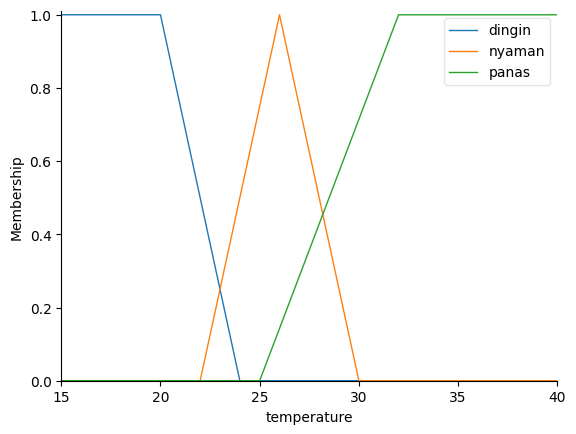

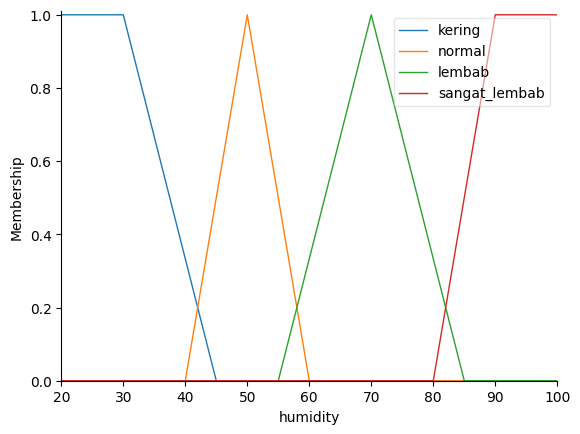

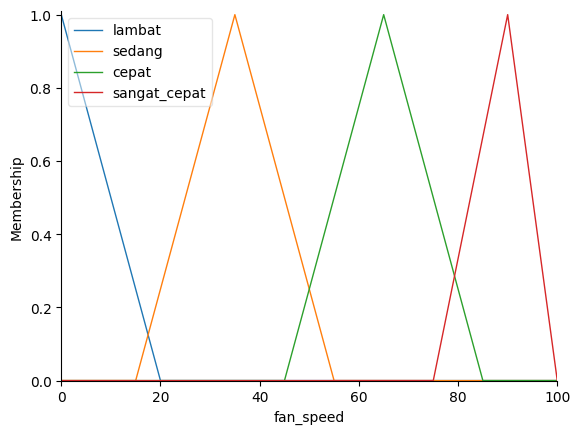

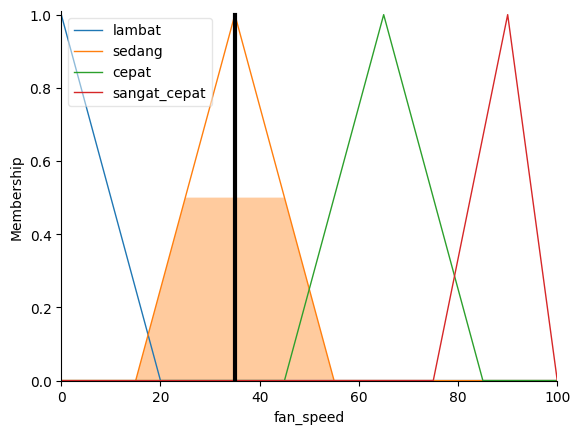

In [34]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Variabel input
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')

# Variabel output
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Fungsi keanggotaan untuk suhu (tidak ada yang di ubah)
temperature["dingin"] = fuzz.trapmf(temperature.universe, [15, 15, 20, 24])
temperature["nyaman"] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature["panas"] = fuzz.trapmf(temperature.universe, [25, 32, 40, 40])

# Fungsi keanggotaan untuk kelembaban (menambahkan kategori baru "sangat_lembab")
humidity["kering"] = fuzz.trapmf(humidity.universe, [20, 20, 30, 45])
humidity["normal"] = fuzz.trimf(humidity.universe, [40, 50, 60])
humidity["lembab"] = fuzz.trimf(humidity.universe, [55, 70, 85])  # Diubah dari trapmf menjadi trimpf
humidity["sangat_lembab"] = fuzz.trapmf(humidity.universe, [80, 90, 100, 100])  # Kategori baru

# Fungsi keanggotaan untuk kecepatan kipas (mengubah nama fungsi dan menguranginya)
fan_speed["lambat"] = fuzz.trimf(fan_speed.universe, [0, 0, 20])
fan_speed["sedang"] = fuzz.trimf(fan_speed.universe, [15, 35, 55])
fan_speed["cepat"] = fuzz.trimf(fan_speed.universe, [45, 65, 85])
fan_speed["sangat_cepat"] = fuzz.trimf(fan_speed.universe, [75, 90, 100])

# Visualisasi fungsi keanggotaan
temperature.view()
humidity.view()
fan_speed.view()

# Aturan fuzzy yang diperbarui (ditambah 4 aturan baru dan disimpan didalam satu variabel)
rules = [
    # Aturan untuk kondisi dingin
    ctrl.Rule(temperature["dingin"] & humidity["kering"], fan_speed["lambat"]),
    ctrl.Rule(temperature["dingin"] & humidity["normal"], fan_speed["lambat"]),
    ctrl.Rule(temperature["dingin"] & humidity["lembab"], fan_speed["sedang"]),
    ctrl.Rule(temperature["dingin"] & humidity["sangat_lembab"], fan_speed["cepat"]),

    # Aturan untuk kondisi nyaman
    ctrl.Rule(temperature["nyaman"] & humidity["kering"], fan_speed["sedang"]),
    ctrl.Rule(temperature["nyaman"] & humidity["normal"], fan_speed["sedang"]),
    ctrl.Rule(temperature["nyaman"] & humidity["lembab"], fan_speed["cepat"]),
    ctrl.Rule(temperature["nyaman"] & humidity["sangat_lembab"], fan_speed["sangat_cepat"]),

    # Aturan untuk kondisi panas
    ctrl.Rule(temperature["panas"] & humidity["kering"], fan_speed["cepat"]),
    ctrl.Rule(temperature["panas"] & humidity["normal"], fan_speed["sangat_cepat"]),
    ctrl.Rule(temperature["panas"] & humidity["lembab"], fan_speed["sangat_cepat"]),
    ctrl.Rule(temperature["panas"] & humidity["sangat_lembab"], fan_speed["sangat_cepat"])
]

# Membuat sistem kontrol
fan_ctrl = ctrl.ControlSystem(rules)
fan_simulation = ctrl.ControlSystemSimulation(fan_ctrl)

# Sistem input dinamis
try:
    input_temp = float(input("Masukkan temperatur (15-40°C): "))
    input_humid = float(input("Masukkan kelembaban (20-100%): "))

    # Validasi input
    input_temp = max(15, min(40, input_temp))
    input_humid = max(20, min(100, input_humid))

    fan_simulation.input['temperature'] = input_temp
    fan_simulation.input['humidity'] = input_humid

    # Komputasi
    fan_simulation.compute()

    # Output hasil
    print("\nHasil Perhitungan Fuzzy Logic:")
    print(f"Suhu: {input_temp}°C")
    print(f"Kelembaban: {input_humid}%")
    print(f"Kecepatan Kipas: {fan_simulation.output['fan_speed']:.2f}%")

    # Visualisasi
    fan_speed.view(sim=fan_simulation)
    plt.show()

except ValueError: # Menangkap error jika input bukan angka
    print("Error: Masukkan harus berupa angka")

**Noted:** saya mengubah beberapa fungsi

**Menggunakan try-except**
- Menghindari Program Berhenti Tiba-tiba (Crash)
- Sebagai validasi rentang input, setelah memastikan input adalah angka, kode membatasi nilai input agar tetap dalam rentang yang diizinkan.
- jika user menginputkan nilai **5°C** maka sistem akan otomatis mengubahnya menjadi **15°C**
- Jenis error yang dtangani `ValueError`, Terjadi jika input tidak bisa diubah menjadi float (misal: huruf, simbol)

